In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv('/content/Ev Vehicles Statewise_India.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State Name                      33 non-null     object 
 1   Two Wheeler                     33 non-null     int64  
 2   Three Wheeler                   29 non-null     float64
 3   Four Wheeler                    33 non-null     int64  
 4   Goods Vehicles                  29 non-null     float64
 5   Public Service Vehicle          25 non-null     float64
 6   Special Category Vehicles       10 non-null     float64
 7   Ambulance/Hearses               6 non-null      float64
 8   Construction Equipment Vehicle  6 non-null      float64
 9   Other                           29 non-null     float64
 10  Grand Total                     33 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 3.0+ KB


In [5]:
df.columns

Index(['State Name', 'Two Wheeler', 'Three Wheeler', 'Four Wheeler',
       'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other',
       'Grand Total'],
      dtype='object')

In [6]:
df.head(5)

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0,NaN,NaN,NaN,7.0,159
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,NaN,NaN,NaN,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,NaN,NaN,NaN,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,NaN,NaN,NaN,8.0,64241
4,Chandigarh,298,1410.0,182,NaN,40.0,NaN,NaN,NaN,1.0,1931


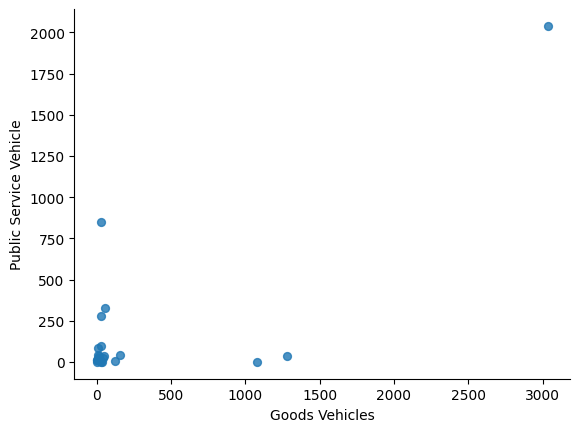

In [70]:
# @title Goods Vehicles vs Public Service Vehicle

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Goods Vehicles', y='Public Service Vehicle', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

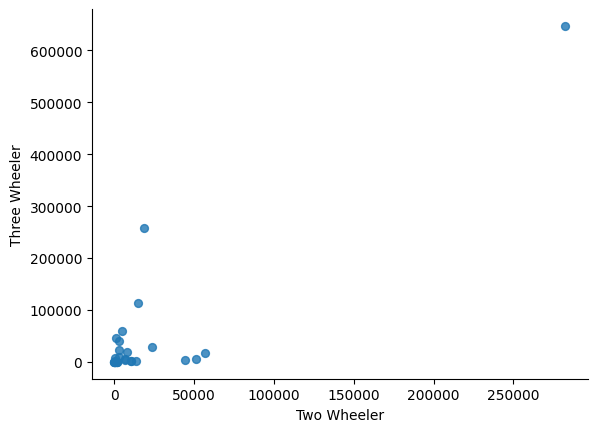

In [11]:
# @title Two Wheeler vs Three Wheeler

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Two Wheeler', y='Three Wheeler', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
ev_sales_df = df.groupby('State Name')['Grand Total'].sum().reset_index()
ev_sales_df

,State Name,Grand Total
0,Andaman and Nicobar Island,159
1,Arunachal Pradesh,20
2,Assam,47947
3,Bihar,64241
4,Chandigarh,1931
5,Chhattisgarh,13428
6,Dadra and Nagar Haveli and Daman and Diu,277
7,Delhi,132302
8,Goa,1686
9,Grand Total,966363


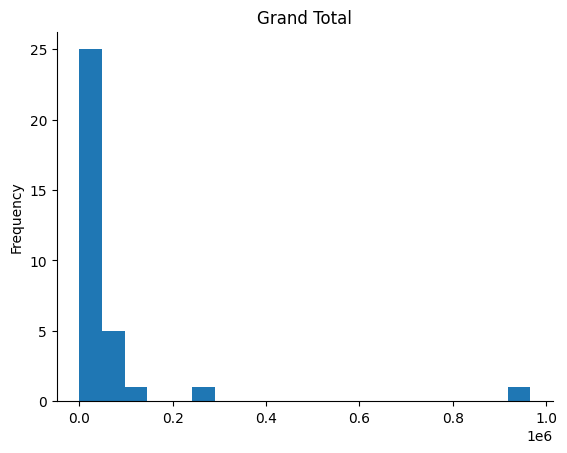

In [71]:
# @title Grand Total

from matplotlib import pyplot as plt
ev_sales_df['Grand Total'].plot(kind='hist', bins=20, title='Grand Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
# Handling missing values
# Columns with a high percentage of missing values
high_missing_cols = ['Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle']

In [20]:
# Drop columns with more than 50% missing values
data_cleaned = df.drop(columns=high_missing_cols)

In [21]:
# Fill missing values in remaining columns with the median
data_cleaned = data_cleaned.fillna(data_cleaned.median(numeric_only=True))

In [22]:
# Visualizing the distributions
plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

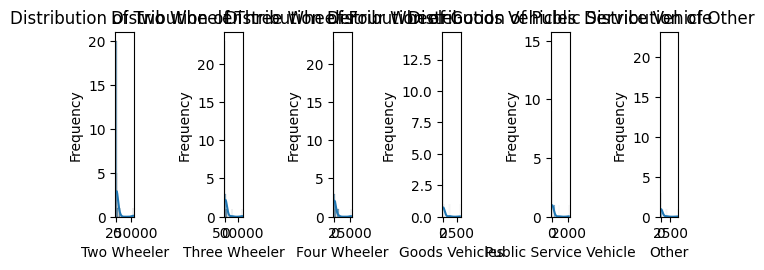

In [69]:
# Plot distributions for each type of vehicle
for i, column in enumerate(data_cleaned.columns[1:-1], 1):
    plt.subplot(2, 6, i)
    sns.histplot(data_cleaned[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

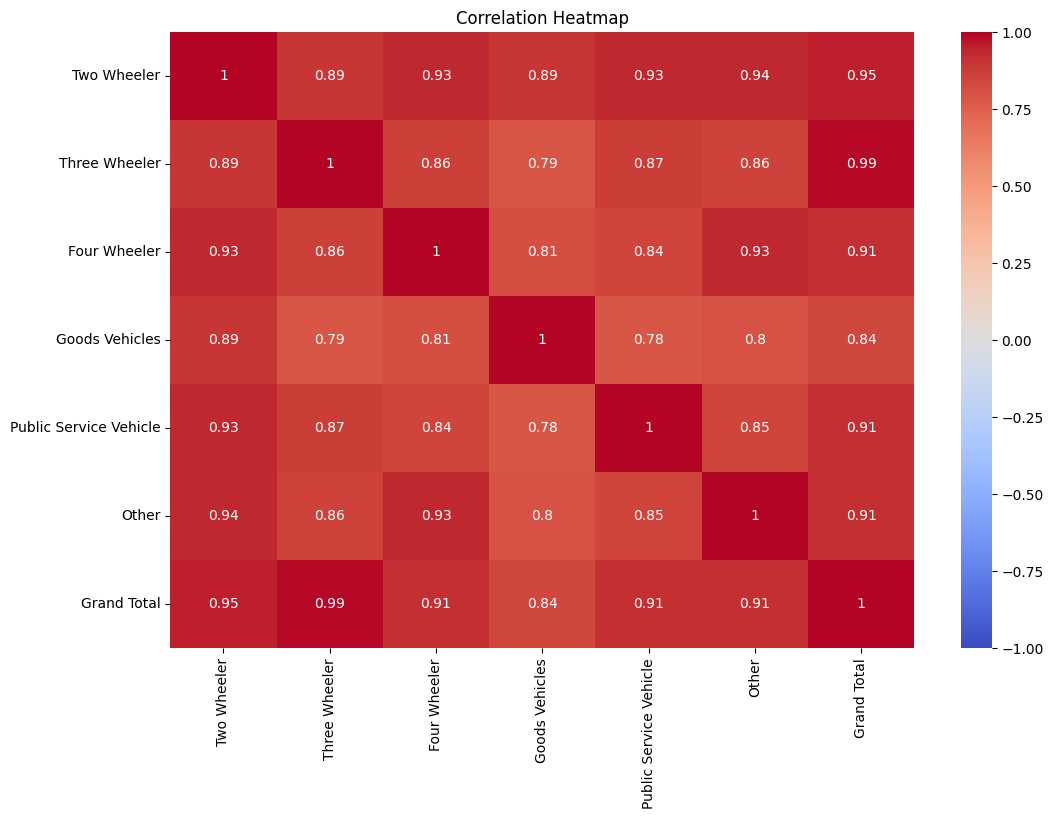

In [25]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numerical columns for correlation calculation
numerical_data = data_cleaned.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

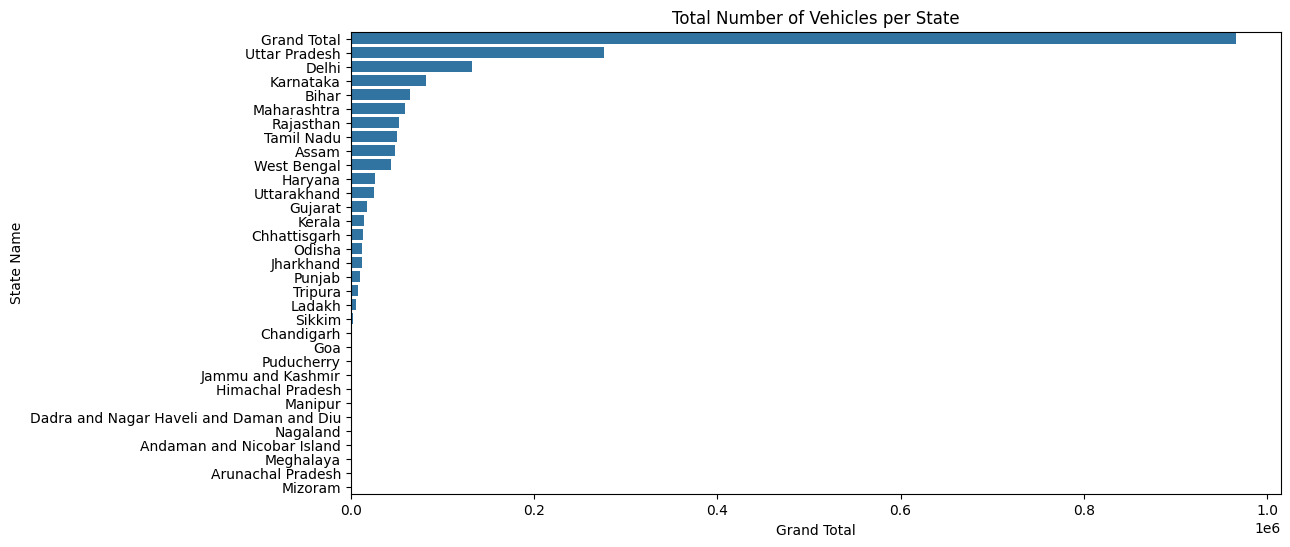

In [29]:
# Bar plot of the total number of vehicles per state
plt.figure(figsize=(12, 6))
# Verify column name and explicitly pass the DataFrame
sns.barplot(x='Grand Total', y='State Name', data=data_cleaned.sort_values('Grand Total', ascending=False))
plt.title('Total Number of Vehicles per State')
plt.xlabel('Grand Total')
plt.ylabel('State Name')
plt.show()

In [32]:
# Plotting the pie chart for vehicle type shares
# Calculate the sum of each vehicle type
vehicle_type_totals = data_cleaned.drop(columns=['State Name', 'Grand Total']).sum()


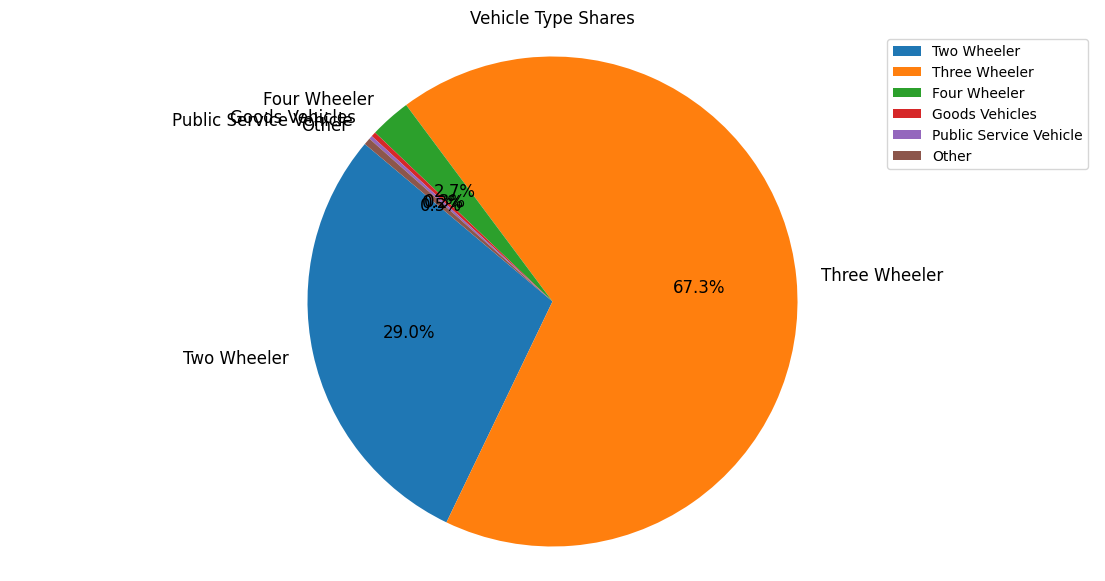

In [45]:
# Plot pie chart
plt.figure(figsize=(14, 7))
plt.pie(vehicle_type_totals, labels=vehicle_type_totals.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('tab10'), textprops={'fontsize': 12}) # Increase font size
plt.title('Vehicle Type Shares')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()

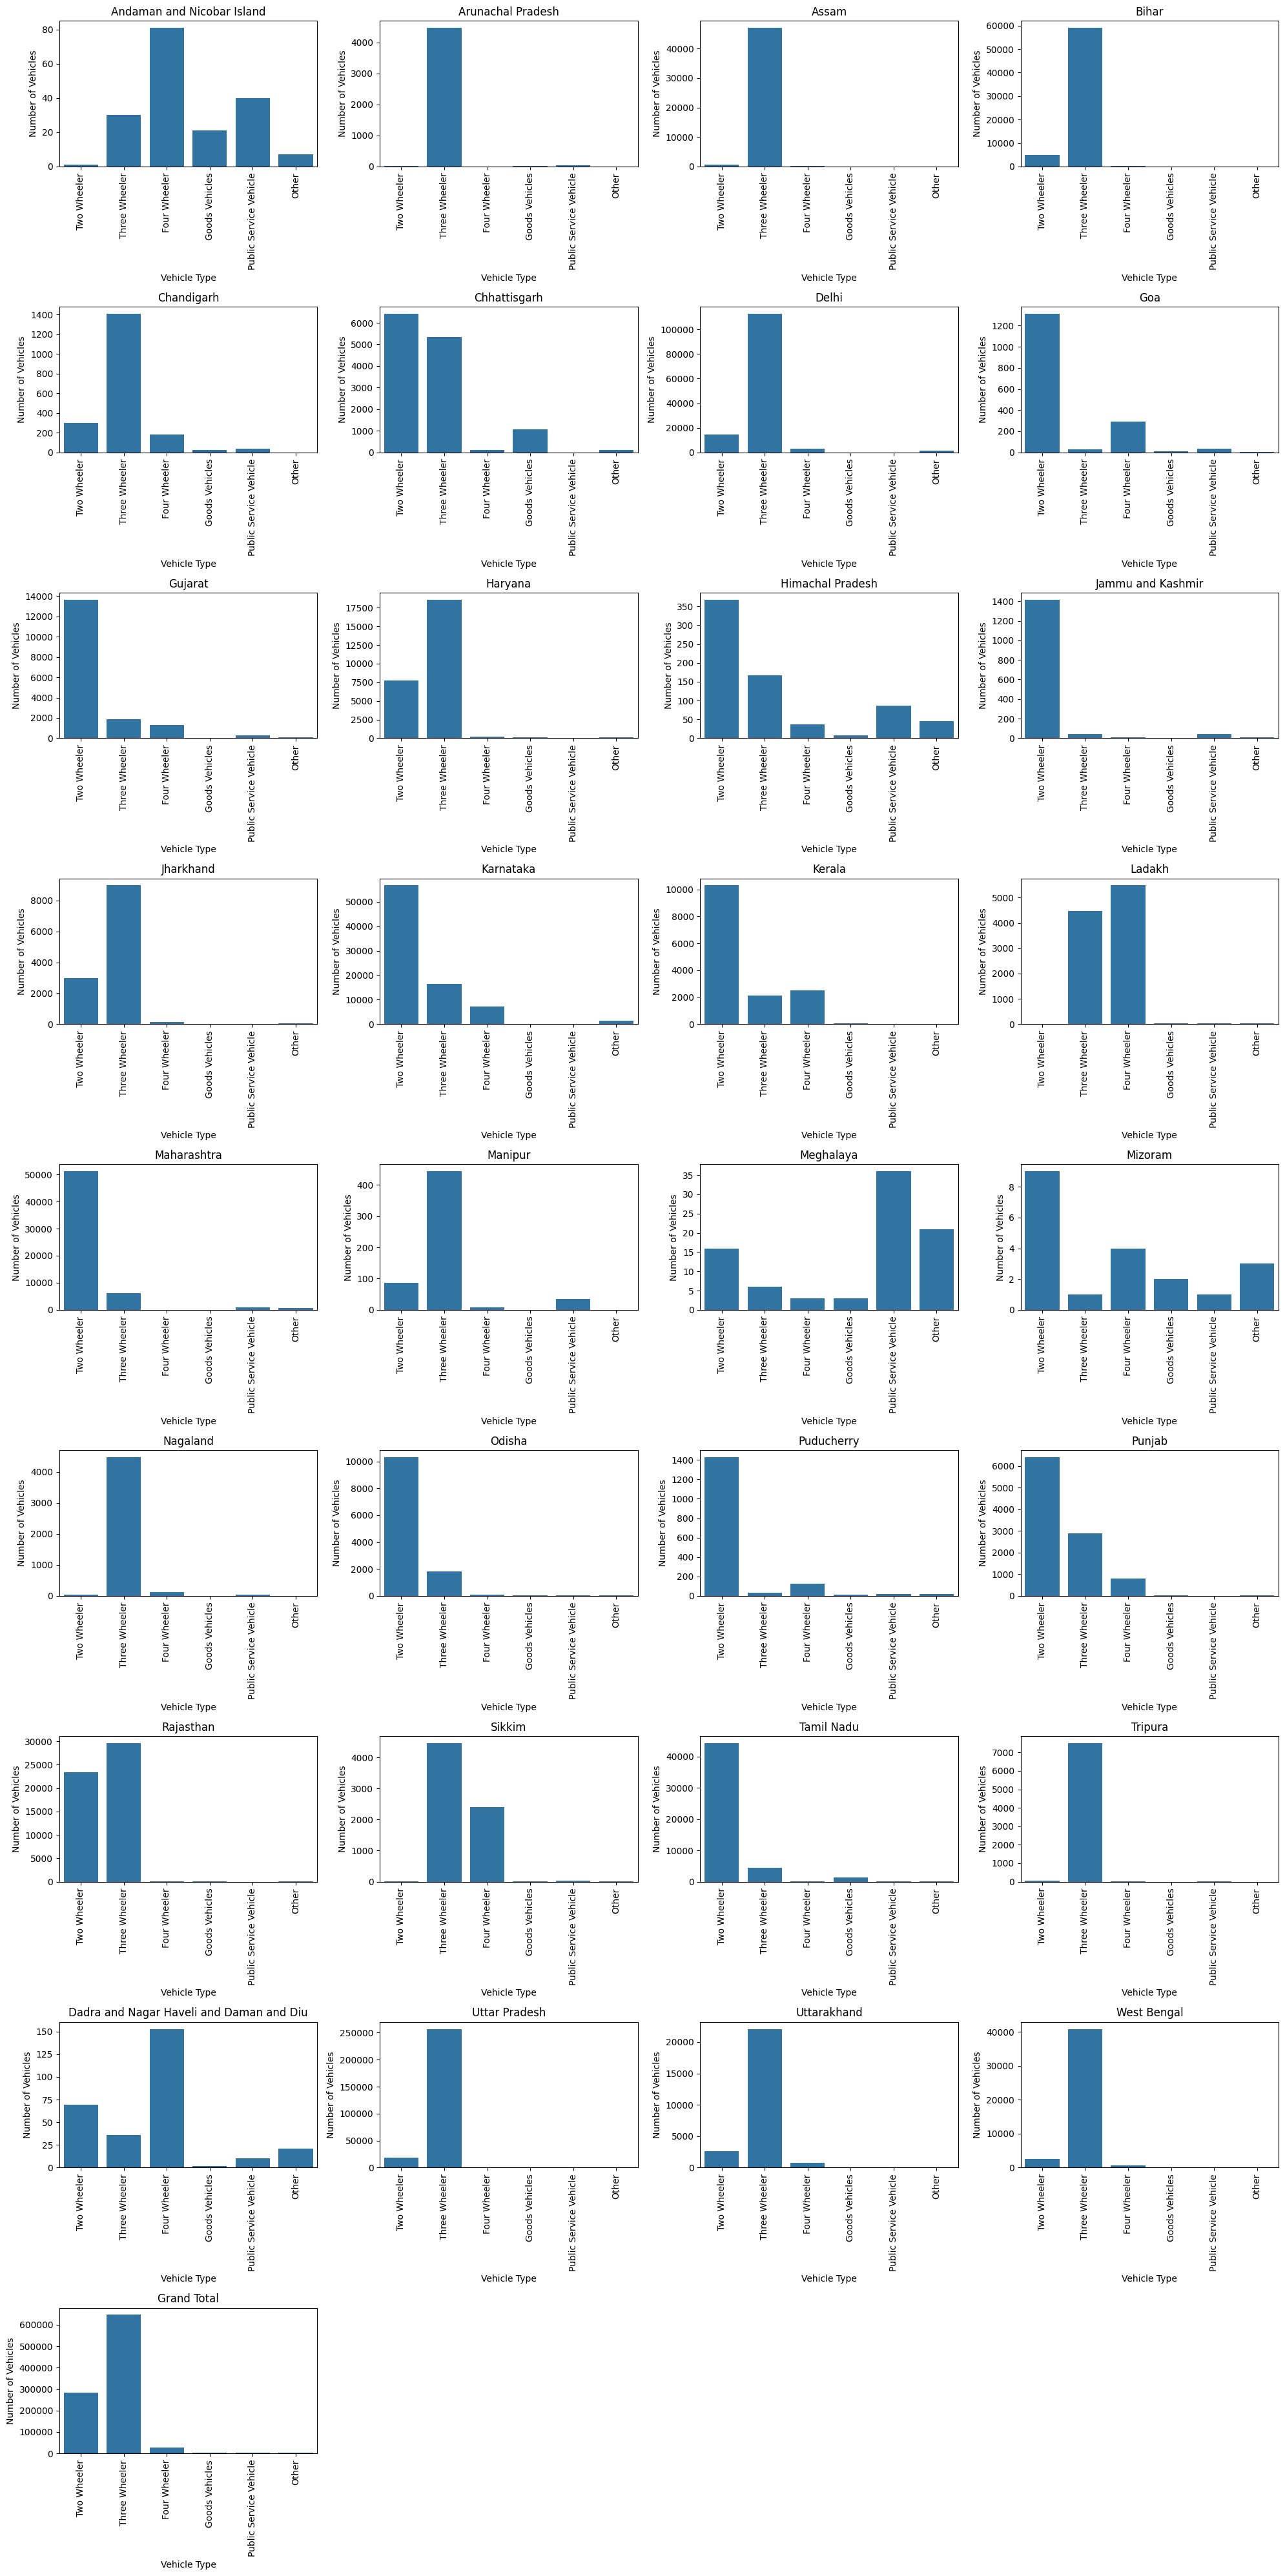

In [46]:
# Plotting individual vehicle sales in each state
vehicle_types = data_cleaned.columns[1:-1]  # Exclude 'State Name' and 'Grand Total'

# Set up the matplotlib figure
plt.figure(figsize=(20, 40))

# Plot bar plots for each state
for i, state in enumerate(data_cleaned['State Name'], 1):
    plt.subplot(9, 4, i)
    sns.barplot(x=vehicle_types, y=data_cleaned.loc[data_cleaned['State Name'] == state, vehicle_types].values.flatten())
    plt.title(state)
    plt.xticks(rotation=90)
    plt.xlabel('Vehicle Type')
    plt.ylabel('Number of Vehicles')

plt.tight_layout()
plt.show()

Conclusion: 

The best market segment for electric vehicles (EVs) in India is a complex choice that depends on factors like market conditions, consumer preferences, and the startup's goals. India’s fast-changing market presents many opportunities for EV adoption across different segments.

Success will come from thorough market research to find the segments with the most growth potential. Urban commuters, delivery services, fleet operators, eco-conscious consumers, and government fleets are all promising groups, but the right choice should match the startup's strengths, resources, and long-term plans.

Additionally, addressing India’s unique challenges—such as the need for better charging infrastructure, government incentives, and making EVs affordable—will be key to making them more attractive and accessible to consumers.

As the EV industry grows, startups should stay flexible and responsive to changes in the market. By keeping up with consumer trends, using new technology, and working with important partners, startups can help drive EV adoption in India and support a more sustainable future in transportation.